In [1]:
import pandas as pd
import warnings as wr
wr.simplefilter("ignore") 

In [2]:
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/refs/heads/main/Bank%20Data.csv'
df = pd.read_csv(url)
pd.set_option('display.max_columns',None)
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1,5.42,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


## 1. Data Preprocessing
- Handle missing and invalid values in the dataset.
- Encode categorical variables appropriately.
- Scale and normalize numeric features for uniformity.
- Detect and address outliers to improve model stability.

In [4]:
df = df.drop(columns=["ID", "Customer_ID", "Name", "SSN", "Month"],axis=1)

In [5]:
df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,24,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,24,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,24_,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,28,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1,5.42,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# Clean Age column
df["Age"] = df["Age"].astype(str).str.replace("_", "", regex=False)   # remove underscores
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")                 
df.loc[df["Age"] <= 0, "Age"] = np.nan
df.loc[df["Age"] > 100, "Age"] = np.nan   

# Impute with median
df["Age"].fillna(df["Age"].median(), inplace=True)

In [8]:
df["Age"] = df["Age"].astype(int)

In [9]:
df.loc[df["Age"] <= 17, "Age"] = np.nan
df["Age"].fillna(df["Age"].median(), inplace=True)

In [10]:
# Replace underscores in Occupation column with "Unknown"
df["Occupation"] = df["Occupation"].replace("_______", "Unknown")

In [11]:
df["Annual_Income"] = df["Annual_Income"].astype(str).str.replace("_", "", regex=False)   # remove underscores
df["Annual_Income"] = pd.to_numeric(df["Annual_Income"], errors="coerce")

In [12]:
df["Monthly_Inhand_Salary"] = df["Monthly_Inhand_Salary"].astype(str).str.replace("_", "", regex=False)
df["Monthly_Inhand_Salary"] = pd.to_numeric(df["Monthly_Inhand_Salary"], errors="coerce")
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(df['Annual_Income'] / 12)   #monthly inhand salary is divided by 12

In [13]:
num_suspicious_rows = df[df['Num_Bank_Accounts'] <=0].shape[0]
print(num_suspicious_rows)

2182


In [14]:
df = df.drop(df[df['Num_Bank_Accounts'] > 10].index)
df=df.drop(df[df['Num_Bank_Accounts'] <=0].index)

In [15]:
df = df.drop(df[df['Num_Credit_Card'] > 10].index)
df=df.drop(df[df['Num_Credit_Card'] <=0].index)

In [16]:
df = df.drop(df[df['Interest_Rate'] > 50].index)
df=df.drop(df[df['Interest_Rate'] <=0].index)

In [17]:
df["Num_of_Loan"] = df["Num_of_Loan"].astype(str).str.replace("_", "", regex=False)
df["Num_of_Loan"] = pd.to_numeric(df["Num_of_Loan"], errors="coerce")

In [18]:
df = df.drop(df[df['Num_of_Loan'] > 10].index)
df=df.drop(df[df['Num_of_Loan'] <0].index)

In [19]:
df['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [20]:
# Clean and standardize Type_of_Loan column
def clean_loan_types(entry):
    if not isinstance(entry, str) or entry.strip() == "":
        return ""
    
    # Replace ' and ' with comma
    entry = entry.replace(" and ", ", ")
    
    # Split by comma and strip extra spaces
    types = [t.strip() for t in entry.split(",")]
    
    # Remove empty strings and 'Not Specified'
    types = [t for t in types if t and t != "Not Specified"]
    
    # Remove duplicates while preserving order
    seen = set()
    clean_types = []
    for t in types:
        if t not in seen:
            seen.add(t)
            clean_types.append(t)
    
    # Join back without trailing comma
    return ", ".join(clean_types)

# Apply to column
df['Type_of_Loan'] = df['Type_of_Loan'].apply(clean_loan_types)

# Check result
print(df['Type_of_Loan'].unique()[:100])

['Auto Loan, Credit-Builder Loan, Personal Loan, Home Equity Loan'
 'Credit-Builder Loan' 'Auto Loan' '' 'Auto Loan, Student Loan'
 'Personal Loan, Debt Consolidation Loan, Auto Loan' 'Payday Loan'
 'Credit-Builder Loan, Personal Loan, Auto Loan'
 'Student Loan, Personal Loan'
 'Personal Loan, Payday Loan, Student Loan, Auto Loan, Home Equity Loan'
 'Student Loan, Credit-Builder Loan, Auto Loan'
 'Payday Loan, Home Equity Loan'
 'Credit-Builder Loan, Mortgage Loan, Payday Loan, Personal Loan'
 'Mortgage Loan, Debt Consolidation Loan, Payday Loan, Auto Loan'
 'Credit-Builder Loan, Mortgage Loan, Student Loan' 'Student Loan'
 'Payday Loan, Credit-Builder Loan, Debt Consolidation Loan, Student Loan'
 'Home Equity Loan, Credit-Builder Loan'
 'Home Equity Loan, Credit-Builder Loan, Debt Consolidation Loan, Mortgage Loan, Auto Loan'
 'Debt Consolidation Loan' 'Payday Loan, Auto Loan'
 'Auto Loan, Student Loan, Payday Loan, Mortgage Loan, Debt Consolidation Loan'
 'Auto Loan, Home Equity Loan

In [21]:
df.head(2)

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,23.0,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,24.0,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196


In [22]:
df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].astype(str).str.replace("_", "", regex=False)
df["Num_of_Delayed_Payment"] = pd.to_numeric(df["Num_of_Delayed_Payment"], errors="coerce")

In [23]:
num_suspicious_rows = df[df['Num_of_Delayed_Payment'] == 'nan'].shape[0]
print(num_suspicious_rows)

0


In [24]:
df = df.drop(df[df['Num_of_Delayed_Payment'] > 50].index)
df=df.drop(df[df['Num_of_Delayed_Payment'] <0].index)

In [25]:
df["Num_of_Delayed_Payment"].fillna(df["Num_of_Delayed_Payment"].median(), inplace=True)

In [26]:
df['Num_of_Delayed_Payment']= df['Num_of_Delayed_Payment'].astype(int)

In [27]:
df.Num_of_Delayed_Payment.unique()

array([ 7,  9,  4,  5,  1,  3, 14,  2,  6, 15, 18, 17, 12,  8, 11,  0, 19,
       20, 10, 13, 22, 23, 21, 16, 24, 27, 25, 26, 28])

In [28]:
df["Changed_Credit_Limit"] = df["Changed_Credit_Limit"].astype(str).str.replace("_", "", regex=False)
df["Changed_Credit_Limit"] = pd.to_numeric(df["Changed_Credit_Limit"], errors="coerce")

In [29]:
df =df.drop(df[df['Changed_Credit_Limit'] <0].index)

In [30]:
df = df.dropna(subset=['Changed_Credit_Limit'])

In [31]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].round(2)

In [32]:
df= df.drop(df[df['Num_Credit_Inquiries']>50].index)

In [33]:
df = df.dropna(subset=['Num_Credit_Inquiries'])

In [34]:
df['Num_Credit_Inquiries']= df['Num_Credit_Inquiries'].astype(int)

In [35]:
df['Credit_Mix']=df['Credit_Mix'].replace('_','Fair')

In [36]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(str).str.replace('_','',regex=False)
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)

In [37]:
df['Credit_Utilization_Ratio'] = df['Credit_Utilization_Ratio'].round(2)

In [38]:
#changing credit history age feature into total credit history months
df['Credit_History_Age_Years'] = df['Credit_History_Age'].apply(lambda x: str(x).split()[0] if pd.notna(x) else None)
df['Credit_History_Age_Months'] = df['Credit_History_Age'].apply(lambda x: str(x).split()[3] if pd.notna(x) else None)

In [39]:
# change data type for this new features
df["Credit_History_Age_Years"] = pd.to_numeric(df["Credit_History_Age_Years"], errors="coerce")
df["Credit_History_Age_Months"] = pd.to_numeric(df["Credit_History_Age_Months"], errors="coerce")

In [40]:
df["Credit_History_Age_total_months"] = df.apply(
    lambda x: (x["Credit_History_Age_Years"] * 12) + x["Credit_History_Age_Months"]
    if x["Credit_History_Age_Years"] is not None or x["Credit_History_Age_Months"] is not None
    else None,
    axis=1
)

In [41]:
df = df.drop(columns=['Credit_History_Age','Credit_History_Age_Years','Credit_History_Age_Months'],axis=1)

In [42]:
df.rename(columns={'Credit_History_Age_total_months': 'Credit_History_Age'}, inplace=True)

In [43]:
df["Credit_History_Age"].fillna(df["Credit_History_Age"].median(), inplace=True) 

In [44]:
df["Credit_History_Age"] = df["Credit_History_Age"].astype(int)

In [45]:
# removing upper 5000 EMI values 
df= df.drop(df[df['Total_EMI_per_month']>5000].index)

In [46]:
df['Total_EMI_per_month'] = df['Total_EMI_per_month'].round(2)

In [47]:
df.shape

(38211, 22)

In [48]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(str).str.replace('_','',regex=False) 
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'],errors='coerce')

In [49]:
df.Amount_invested_monthly.isnull().sum()

1760

In [50]:
df = df.dropna(subset=['Amount_invested_monthly'])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36451 entries, 1 to 49999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       36451 non-null  float64
 1   Occupation                36451 non-null  object 
 2   Annual_Income             36451 non-null  float64
 3   Monthly_Inhand_Salary     36451 non-null  float64
 4   Num_Bank_Accounts         36451 non-null  int64  
 5   Num_Credit_Card           36451 non-null  int64  
 6   Interest_Rate             36451 non-null  int64  
 7   Num_of_Loan               36451 non-null  int64  
 8   Type_of_Loan              36451 non-null  object 
 9   Delay_from_due_date       36451 non-null  int64  
 10  Num_of_Delayed_Payment    36451 non-null  int32  
 11  Changed_Credit_Limit      36451 non-null  float64
 12  Num_Credit_Inquiries      36451 non-null  int32  
 13  Credit_Mix                36451 non-null  object 
 14  Outstanding

In [52]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8','Unknown')

In [53]:
df['Monthly_Balance'] = df['Monthly_Balance'].astype(str).str.replace('_','',regex=False) 
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'],errors='coerce')

In [54]:
df = df.drop(df[df['Monthly_Balance'] <0].index)

In [55]:
df = df.dropna(subset=['Monthly_Balance'])

In [56]:
df = df.drop(df[df['Delay_from_due_date'] <0].index)

In [57]:
df['Monthly_Balance'].describe()

count    35859.000000
mean       396.726838
std        208.854698
min          0.103402
25%        268.620655
50%        332.485796
75%        462.538129
max       1606.518192
Name: Monthly_Balance, dtype: float64

In [58]:
df['Age'] = df['Age'].astype(int)

## 2. Exploratory Data Analysis (EDA)
- Perform descriptive statistics to understand the data distribution.
- Visualize relationships between features and the target variable.
- Analyze correlations and identify trends or anomalies in the data.

In [60]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age
count,35859.000000,3.585900e+04,3.585900e+04,35859.000000,35859.000000,35859.000000,35859.000000,35859.000000,35859.000000,35859.000000,35859.000000,35859.000000,35859.000000,35859.000000,35859.000000,35859.000000,35859.000000
mean,34.545749,1.594148e+05,5.355612e+03,5.634346,5.606012,14.987535,3.603029,21.744611,13.817312,10.804721,7.453080,1465.361755,32.277929,126.724932,634.736815,396.726838,222.980256
std,9.691835,1.327360e+06,4.166805e+04,2.360395,2.053592,8.712376,2.450822,14.780568,5.845254,6.673143,3.961721,1170.338644,5.091646,209.046925,2062.918019,208.854698,95.065372
min,18.000000,7.005930e+03,3.036454e+02,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.340000,20.800000,0.000000,0.000000,0.103402,10.000000
25%,27.000000,1.904268e+04,1.587629e+03,4.000000,4.000000,8.000000,2.000000,11.000000,10.000000,5.800000,4.000000,585.590000,28.060000,31.370000,72.746945,268.620655,155.000000
50%,34.000000,3.615419e+04,2.998562e+03,6.000000,6.000000,14.000000,3.000000,19.000000,14.000000,9.720000,7.000000,1203.560000,32.290000,70.960000,131.809226,332.485796,221.000000
75%,42.000000,7.038300e+04,5.766783e+03,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,15.300000,10.000000,2033.790000,36.470000,158.805000,252.304851,462.538129,292.000000
max,95.000000,2.413726e+07,1.979290e+06,10.000000,10.000000,34.000000,9.000000,67.000000,28.000000,36.650000,42.000000,4998.070000,48.540000,4897.000000,10000.000000,1606.518192,408.000000


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

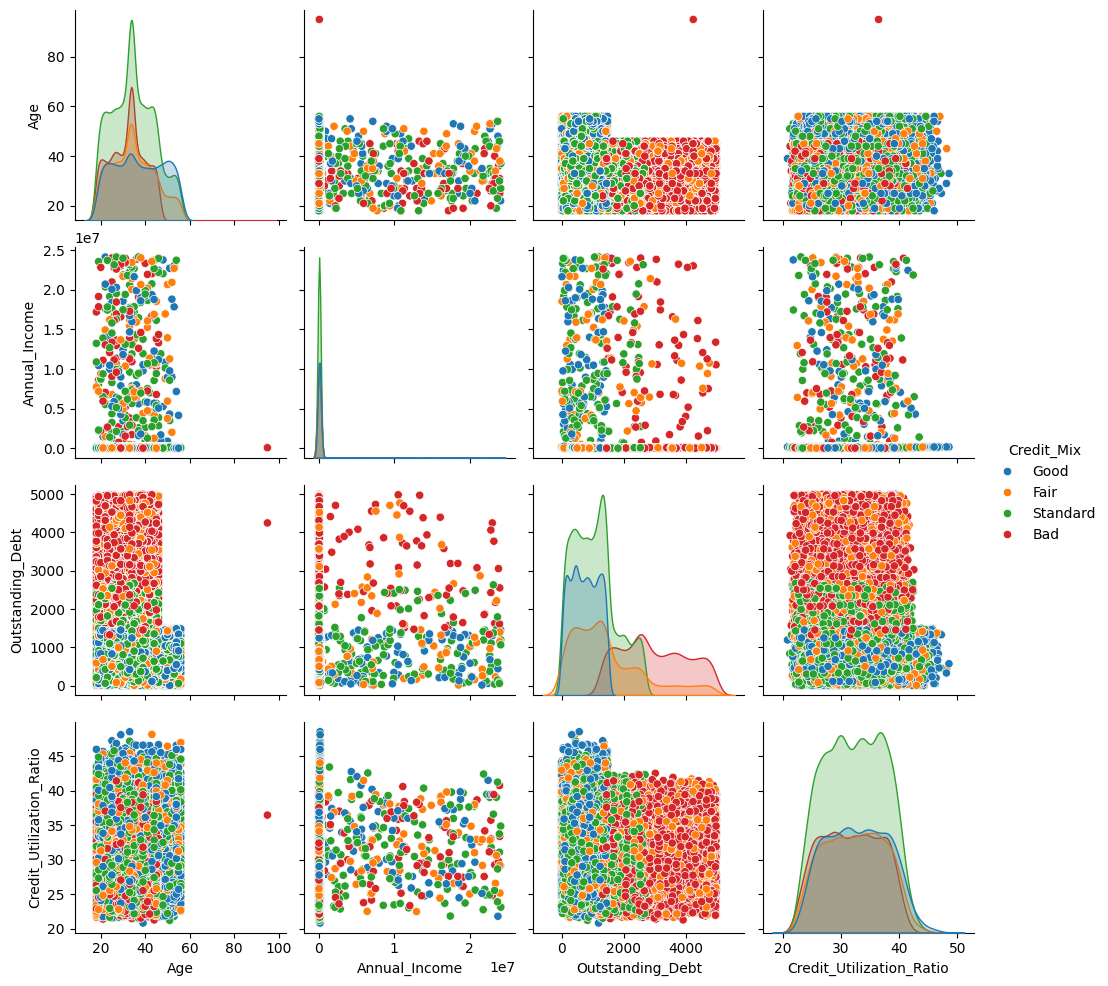

In [62]:
sns.pairplot(df, vars=['Age', 'Annual_Income', 'Outstanding_Debt','Credit_Utilization_Ratio'], hue='Credit_Mix')

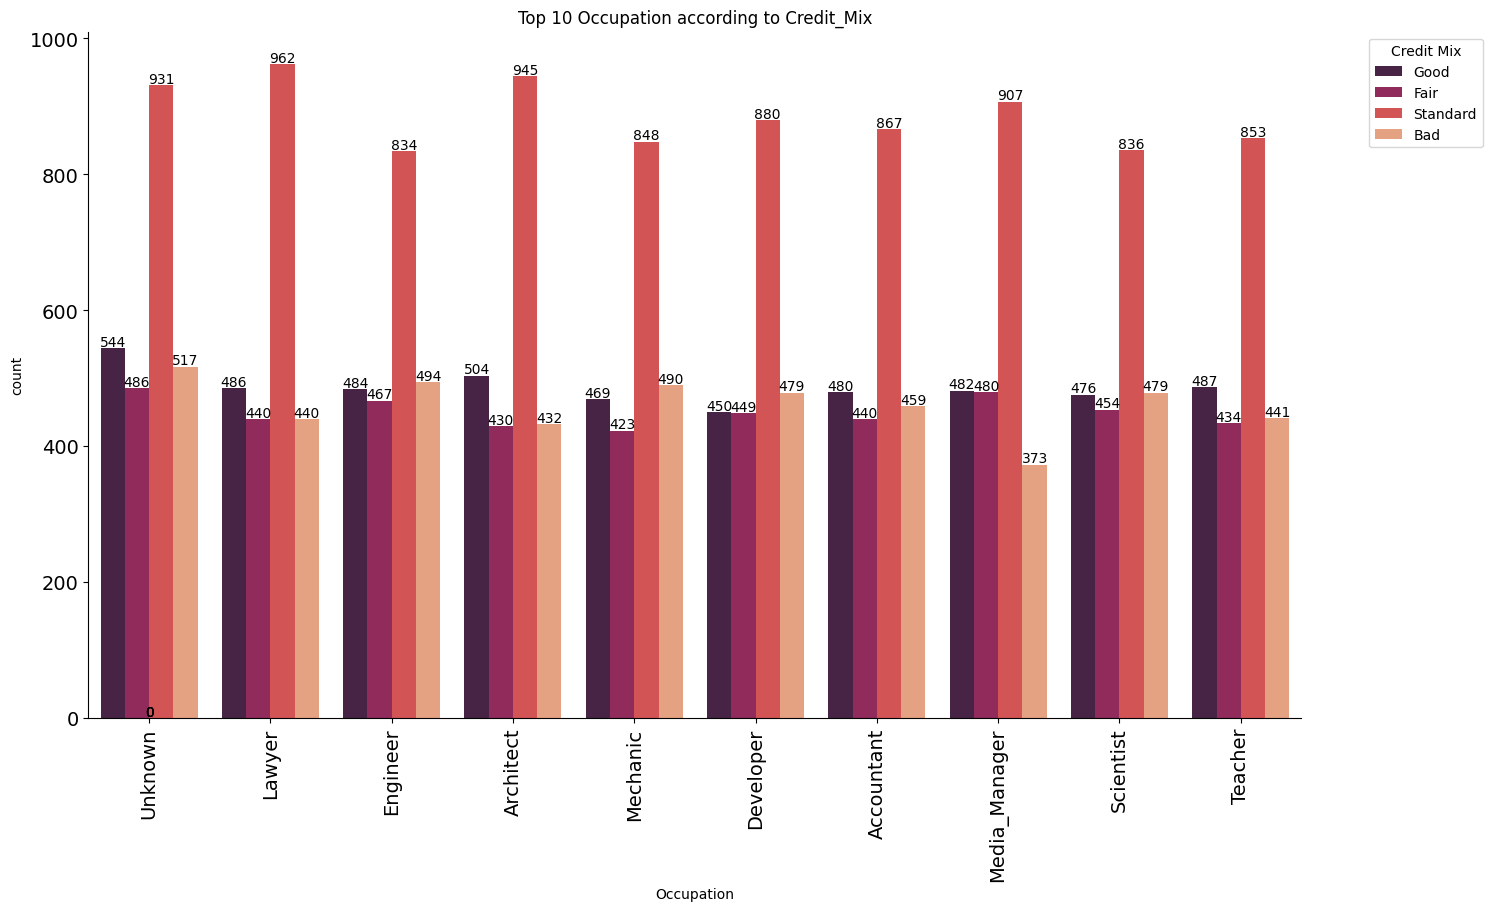

In [63]:
plt.figure(figsize=(15,9))
occupation_value = df['Occupation'].value_counts()
sns.countplot(data=df, x='Occupation',palette ='rocket',hue='Credit_Mix',
              order=['Unknown','Lawyer','Engineer','Architect','Mechanic','Developer','Accountant','Media_Manager','Scientist','Teacher'])
plt.xticks(rotation=90,size=14)
plt.yticks(size=14)
sns.despine(right=True)
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2,  
             p.get_height() + 3,          
             int(p.get_height()),           
             ha='center')

plt.legend(title='Credit Mix', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.title('Top 10 Occupation according to Credit_Mix')
plt.show()

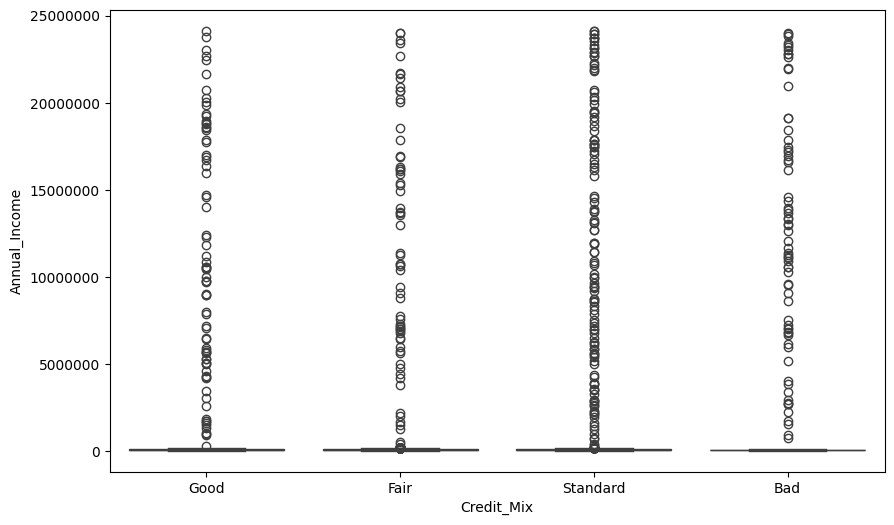

In [64]:
from matplotlib.ticker import ScalarFormatter

plt.figure(figsize=(10, 6))
sns.boxplot(x='Credit_Mix', y='Annual_Income', data=df)

plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.ticklabel_format(style='plain', axis='y')

plt.show()

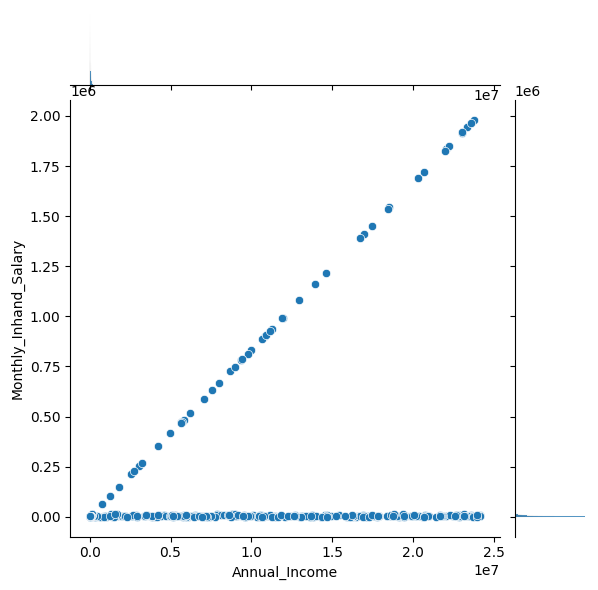

In [65]:
columns= df[['Annual_Income','Monthly_Inhand_Salary']] 
plot_data =columns[columns.notnull().all(axis=1)]
sns.jointplot(data=plot_data,x='Annual_Income',y='Monthly_Inhand_Salary')
plt.show()

In [66]:
df.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_History_Age'],
      dtype='object')

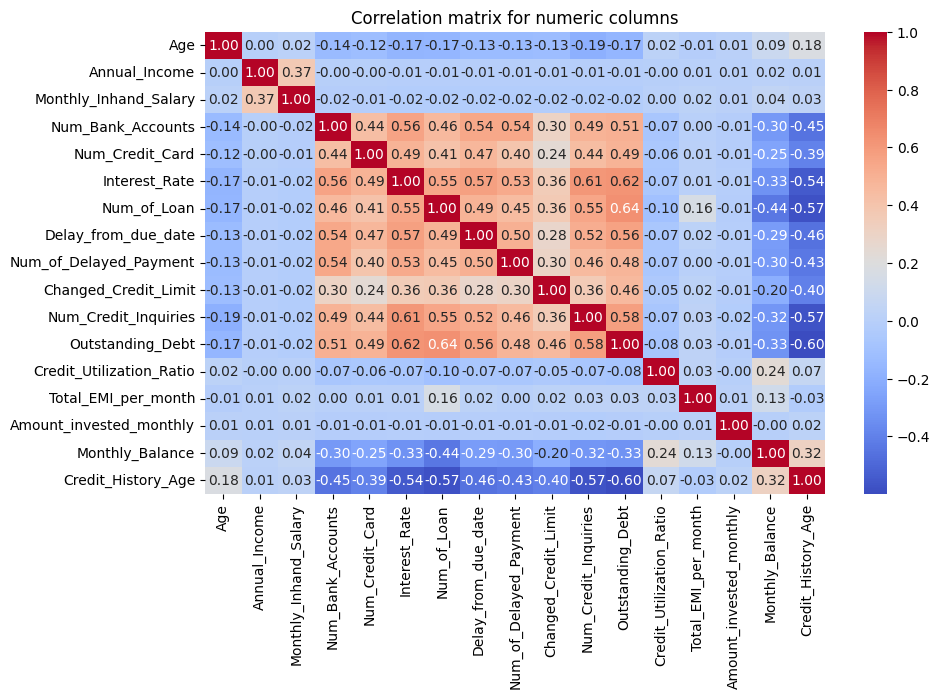

In [67]:
num_data = df[['Age',
'Annual_Income',
'Monthly_Inhand_Salary',
'Num_Bank_Accounts',
'Num_Credit_Card',
'Interest_Rate',
'Num_of_Loan',
'Delay_from_due_date',
'Num_of_Delayed_Payment', 
'Changed_Credit_Limit',
'Num_Credit_Inquiries',
'Outstanding_Debt',
'Credit_Utilization_Ratio',
'Total_EMI_per_month',
'Amount_invested_monthly',
'Monthly_Balance',
'Credit_History_Age']]
plt.figure(figsize=(10,6))
correlation_matrix= num_data.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='0.2f')
plt.title('Correlation matrix for numeric columns')
plt.show()

### Encoding and Scaling the features

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35859 entries, 1 to 49999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       35859 non-null  int32  
 1   Occupation                35859 non-null  object 
 2   Annual_Income             35859 non-null  float64
 3   Monthly_Inhand_Salary     35859 non-null  float64
 4   Num_Bank_Accounts         35859 non-null  int64  
 5   Num_Credit_Card           35859 non-null  int64  
 6   Interest_Rate             35859 non-null  int64  
 7   Num_of_Loan               35859 non-null  int64  
 8   Type_of_Loan              35859 non-null  object 
 9   Delay_from_due_date       35859 non-null  int64  
 10  Num_of_Delayed_Payment    35859 non-null  int32  
 11  Changed_Credit_Limit      35859 non-null  float64
 12  Num_Credit_Inquiries      35859 non-null  int32  
 13  Credit_Mix                35859 non-null  object 
 14  Outstanding

In [70]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [71]:
df['Type_of_Loan'] = df['Type_of_Loan'].str.strip()
df['Type_of_Loan'] = df['Type_of_Loan'].replace('', np.nan)

In [72]:
mode_loan = df['Type_of_Loan'].mode()[0]

def impute_loan(row):
    if pd.isna(row['Type_of_Loan']):
        if row['Num_of_Loan'] == 0:
            return "No Loan"
        else:
            return mode_loan
    return row['Type_of_Loan']

df['Type_of_Loan'] = df.apply(impute_loan, axis=1)

In [73]:
from sklearn.preprocessing import MultiLabelBinarizer

#Split each row into a list of loan types
df['Type_of_Loan_list'] = df['Type_of_Loan'].str.split(',').apply(lambda x: [t.strip() for t in x])

# Apply MultiLabelBinarizer
mlb = MultiLabelBinarizer()
encoded = mlb.fit_transform(df['Type_of_Loan_list'])

# Convert back to DataFrame with column names
encoded_df = pd.DataFrame(encoded, columns=mlb.classes_, index=df.index)

#  Merge with original df
df = pd.concat([df, encoded_df], axis=1)

In [74]:
df = df.drop(columns=['Type_of_Loan', 'Type_of_Loan_list'])

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35859 entries, 1 to 49999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       35859 non-null  int32  
 1   Occupation                35859 non-null  object 
 2   Annual_Income             35859 non-null  float64
 3   Monthly_Inhand_Salary     35859 non-null  float64
 4   Num_Bank_Accounts         35859 non-null  int64  
 5   Num_Credit_Card           35859 non-null  int64  
 6   Interest_Rate             35859 non-null  int64  
 7   Num_of_Loan               35859 non-null  int64  
 8   Delay_from_due_date       35859 non-null  int64  
 9   Num_of_Delayed_Payment    35859 non-null  int32  
 10  Changed_Credit_Limit      35859 non-null  float64
 11  Num_Credit_Inquiries      35859 non-null  int32  
 12  Credit_Mix                35859 non-null  object 
 13  Outstanding_Debt          35859 non-null  float64
 14  Credit_Util

In [76]:
# lebel encoding
col_encoded = ['Occupation','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour']
for col in col_encoded:
    le = LabelEncoder()
    df[col + '_encoded'] = le.fit_transform(df[col])

print(df)

       Age Occupation  Annual_Income  Monthly_Inhand_Salary  \
1       24  Scientist       19114.12            1824.843333   
3       24  Scientist       19114.12            1592.843333   
4       28    Unknown       34847.84            3037.986667   
5       28    Teacher       34847.84            3037.986667   
6       28    Teacher       34847.84            3037.986667   
...    ...        ...            ...                    ...   
49995   33  Architect       20002.88            1929.906667   
49996   25   Mechanic       39628.99            3302.415833   
49997   25   Mechanic       39628.99            3359.415833   
49998   25   Mechanic       39628.99            3302.415833   
49999   25   Mechanic       39628.99            3359.415833   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
1                      3                4              3            4   
3                      3                4              3            4   
4                      2

In [77]:
df = df.drop(columns=['Occupation','Credit_Mix','Payment_Behaviour','Payment_of_Min_Amount'])

In [78]:
df.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,No Loan,Payday Loan,Personal Loan,Student Loan,Occupation_encoded,Credit_Mix_encoded,Payment_of_Min_Amount_encoded,Payment_Behaviour_encoded
1,24,19114.12,1824.843333,3,4,3,4,3,9,13.27,4,809.98,33.05,49.57,21.465380,361.444004,274,1,1,0,1,0,0,0,1,0,12,2,1,1
3,24,19114.12,1592.843333,3,4,3,4,4,5,11.27,4,809.98,32.43,49.57,39.082511,343.826873,276,1,1,0,1,0,0,0,1,0,12,2,1,1
4,28,34847.84,3037.986667,2,4,6,1,3,1,5.42,5,605.03,25.93,18.82,39.684018,485.298434,327,0,1,0,0,0,0,0,0,0,14,2,1,0
5,28,34847.84,3037.986667,2,4,6,1,3,3,5.42,5,605.03,30.12,18.82,251.627369,303.355083,328,0,1,0,0,0,0,0,0,0,13,2,1,3
6,28,34847.84,3037.986667,2,4,6,1,3,14,5.42,5,605.03,31.00,18.82,72.680145,452.302307,329,0,1,0,0,0,0,0,0,0,13,1,1,0


In [79]:
features_to_scale = df.drop('Credit_Mix_encoded', axis=1)
credit_mix = df['Credit_Mix_encoded']

In [80]:
# min max scaling
mmx = MinMaxScaler()
scaled_data = mmx.fit_transform(features_to_scale)

In [81]:
scaled_df = pd.DataFrame(scaled_data, columns=features_to_scale.columns)
scaled_df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,No Loan,Payday Loan,Personal Loan,Student Loan,Occupation_encoded,Payment_of_Min_Amount_encoded,Payment_Behaviour_encoded
0,0.077922,0.000502,0.000769,0.222222,0.333333,0.060606,0.444444,0.044776,0.321429,0.362074,0.095238,0.162002,0.441601,0.010123,0.002147,0.224936,0.663317,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.800000,0.5,0.166667
1,0.077922,0.000502,0.000651,0.222222,0.333333,0.060606,0.444444,0.059701,0.178571,0.307503,0.095238,0.162002,0.419250,0.010123,0.003908,0.213969,0.668342,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.800000,0.5,0.166667
2,0.129870,0.001154,0.001382,0.111111,0.333333,0.151515,0.111111,0.044776,0.035714,0.147885,0.119048,0.120993,0.184932,0.003843,0.003968,0.302036,0.796482,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.933333,0.5,0.000000
3,0.129870,0.001154,0.001382,0.111111,0.333333,0.151515,0.111111,0.044776,0.107143,0.147885,0.119048,0.120993,0.335977,0.003843,0.025163,0.188775,0.798995,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.866667,0.5,0.500000
4,0.129870,0.001154,0.001382,0.111111,0.333333,0.151515,0.111111,0.044776,0.500000,0.147885,0.119048,0.120993,0.367700,0.003843,0.007268,0.281496,0.801508,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.866667,0.5,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35854,0.194805,0.000539,0.000822,1.000000,0.777778,0.848485,0.555556,0.492537,0.892857,0.499591,0.285714,0.714596,0.503965,0.012448,0.014649,0.171460,0.530151,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.066667,1.0,0.833333
35855,0.090909,0.001352,0.001515,0.333333,0.555556,0.181818,0.222222,0.298507,0.500000,0.313779,0.166667,0.100454,0.250901,0.007168,0.018144,0.254785,0.937186,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.600000,0.0,0.833333
35856,0.090909,0.001352,0.001544,0.333333,0.555556,0.181818,0.222222,0.343284,0.178571,0.368349,0.166667,0.100454,0.578947,0.007168,1.000000,0.217642,0.939698,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.600000,0.5,0.500000
35857,0.090909,0.001352,0.001515,0.333333,0.555556,0.181818,0.222222,0.313433,0.214286,0.313779,0.166667,0.100454,0.661139,0.007168,0.009760,0.288304,0.942211,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.600000,0.5,0.333333


## 3. Model Building
- Train multiple machine learning models using the preprocessed data.
- Evaluate the suitability of various models for the task.

In [83]:
scaled_df.shape

(35859, 29)

In [84]:
x = scaled_df
y = pd.DataFrame(credit_mix,columns=['Credit_Mix_encoded'])

In [85]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.3, random_state = 30)   

In [86]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(25101, 29)
(25101, 1)
(10758, 29)
(10758, 1)


In [87]:
#validation data
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, random_state=42, test_size=.50)
x_test.shape # 15% of total data

(5379, 29)

In [88]:
x_val.shape # 15% of total data ; for hyper param tuning

(5379, 29)

### Random Forest

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,f1_score,recall_score,precision_score,confusion_matrix

In [91]:
rf_model = RandomForestClassifier(min_samples_split=10, min_samples_leaf=5,max_features="sqrt",random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

In [92]:
rf_model.score(x_train,y_train)

0.8229950997968208

In [93]:
print("\nRandom Forest Model Performance:") 
print("Accuracy:", accuracy_score(y_test, y_pred_rf), '\n') 
print("Classification Report:") 
print(classification_report(y_test, y_pred_rf))


Random Forest Model Performance:
Accuracy: 0.7664993493214353 

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.97      0.87      1103
           1       0.33      0.00      0.01      1075
           2       0.75      0.95      0.84      1099
           3       0.77      0.95      0.85      2102

    accuracy                           0.77      5379
   macro avg       0.66      0.72      0.64      5379
weighted avg       0.68      0.77      0.68      5379



## Filter Methods - Extra Trees Classifier

In [95]:
from sklearn.ensemble import ExtraTreesClassifier 

In [96]:
extr = ExtraTreesClassifier()

In [97]:
extr.fit(x,y)

ExtraTreesClassifier()

In [98]:
feature_importance = extr.feature_importances_
feature_importance #info gain

array([0.02447564, 0.01965232, 0.02452883, 0.0688165 , 0.03528663,
       0.08931143, 0.04603709, 0.0658579 , 0.08688918, 0.04451279,
       0.03268523, 0.06680403, 0.03672491, 0.01908296, 0.03455863,
       0.03695281, 0.05291509, 0.0105499 , 0.01053201, 0.01034444,
       0.01051759, 0.0107566 , 0.00330263, 0.01037731, 0.01053268,
       0.01028026, 0.02254448, 0.07398775, 0.03118237])

In [99]:
imp = pd.DataFrame(feature_importance, columns=['Gain_Score'])
imp

,Gain_Score
0,0.024476
1,0.019652
2,0.024529
3,0.068816
4,0.035287
5,0.089311
6,0.046037
7,0.065858
8,0.086889
9,0.044513


In [100]:
x.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_History_Age', 'Auto Loan', 'Credit-Builder Loan',
       'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
       'No Loan', 'Payday Loan', 'Personal Loan', 'Student Loan',
       'Occupation_encoded', 'Payment_of_Min_Amount_encoded',
       'Payment_Behaviour_encoded'],
      dtype='object')

In [101]:
cols = pd.DataFrame(x.columns, columns=['Feature_Names'])
gains = pd.concat([cols,imp],axis=1)
gains

,Feature_Names,Gain_Score
0,Age,0.024476
1,Annual_Income,0.019652
2,Monthly_Inhand_Salary,0.024529
3,Num_Bank_Accounts,0.068816
4,Num_Credit_Card,0.035287
5,Interest_Rate,0.089311
6,Num_of_Loan,0.046037
7,Delay_from_due_date,0.065858
8,Num_of_Delayed_Payment,0.086889
9,Changed_Credit_Limit,0.044513


In [102]:
gains.nlargest(15,'Gain_Score') 

,Feature_Names,Gain_Score
5,Interest_Rate,0.089311
8,Num_of_Delayed_Payment,0.086889
27,Payment_of_Min_Amount_encoded,0.073988
3,Num_Bank_Accounts,0.068816
11,Outstanding_Debt,0.066804
7,Delay_from_due_date,0.065858
16,Credit_History_Age,0.052915
6,Num_of_Loan,0.046037
9,Changed_Credit_Limit,0.044513
15,Monthly_Balance,0.036953


In [103]:
 gains.nsmallest(12,'Gain_Score') # lowest info gain

,Feature_Names,Gain_Score
22,No Loan,0.003303
25,Student Loan,0.010280
19,Debt Consolidation Loan,0.010344
23,Payday Loan,0.010377
20,Home Equity Loan,0.010518
18,Credit-Builder Loan,0.010532
24,Personal Loan,0.010533
17,Auto Loan,0.010550
21,Mortgage Loan,0.010757
13,Total_EMI_per_month,0.019083


<Axes: >

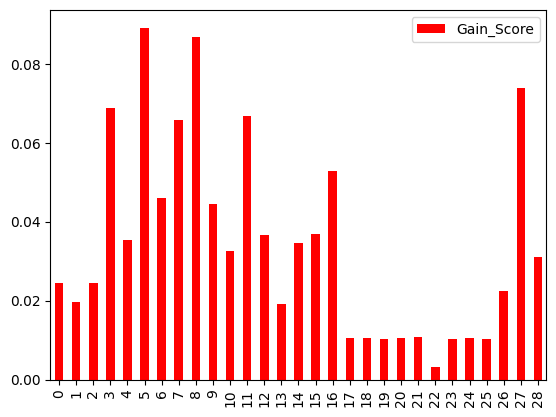

In [104]:
gains.plot(kind='bar', color=['red']) 

In [105]:
x.shape

(35859, 29)

In [106]:
x2 = x.copy()

In [107]:
gains.nsmallest(15,'Gain_Score')

,Feature_Names,Gain_Score
22,No Loan,0.003303
25,Student Loan,0.010280
19,Debt Consolidation Loan,0.010344
23,Payday Loan,0.010377
20,Home Equity Loan,0.010518
18,Credit-Builder Loan,0.010532
24,Personal Loan,0.010533
17,Auto Loan,0.010550
21,Mortgage Loan,0.010757
13,Total_EMI_per_month,0.019083


<Axes: >

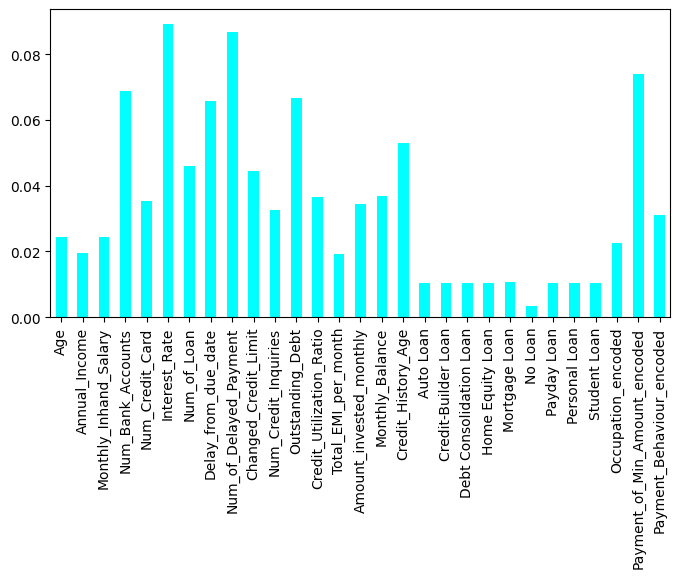

In [108]:
features = pd.Series(extr.feature_importances_, index = x.columns) 
plt.figure(figsize=(8,4)) 
features.plot(kind='bar', color='cyan') 
#plt.savefig('score1.png') 

In [109]:
x2.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,No Loan,Payday Loan,Personal Loan,Student Loan,Occupation_encoded,Payment_of_Min_Amount_encoded,Payment_Behaviour_encoded
0,0.077922,0.000502,0.000769,0.222222,0.333333,0.060606,0.444444,0.044776,0.321429,0.362074,0.095238,0.162002,0.441601,0.010123,0.002147,0.224936,0.663317,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.800000,0.5,0.166667
1,0.077922,0.000502,0.000651,0.222222,0.333333,0.060606,0.444444,0.059701,0.178571,0.307503,0.095238,0.162002,0.419250,0.010123,0.003908,0.213969,0.668342,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.800000,0.5,0.166667
2,0.129870,0.001154,0.001382,0.111111,0.333333,0.151515,0.111111,0.044776,0.035714,0.147885,0.119048,0.120993,0.184932,0.003843,0.003968,0.302036,0.796482,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.933333,0.5,0.000000
3,0.129870,0.001154,0.001382,0.111111,0.333333,0.151515,0.111111,0.044776,0.107143,0.147885,0.119048,0.120993,0.335977,0.003843,0.025163,0.188775,0.798995,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.866667,0.5,0.500000
4,0.129870,0.001154,0.001382,0.111111,0.333333,0.151515,0.111111,0.044776,0.500000,0.147885,0.119048,0.120993,0.367700,0.003843,0.007268,0.281496,0.801508,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.866667,0.5,0.000000


In [110]:
x2 = x2.drop(columns= ['Annual_Income','Total_EMI_per_month','Auto Loan', 'Credit-Builder Loan',
       'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
       'No Loan', 'Payday Loan', 'Personal Loan', 'Student Loan',
       'Occupation_encoded','Monthly_Inhand_Salary'])

In [111]:
x2.columns   # these columns are taken for next analysis

Index(['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
       'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Amount_invested_monthly',
       'Monthly_Balance', 'Credit_History_Age',
       'Payment_of_Min_Amount_encoded', 'Payment_Behaviour_encoded'],
      dtype='object')

In [112]:
y2 = y.copy()

In [113]:
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size =0.3, random_state = 30) 

In [114]:
#validation data
x2_test, x2_val, y2_test, y2_val = train_test_split(x2_test, y2_test, random_state=42, test_size=.50)
x2_test.shape # 15% of total data

(5379, 16)

In [115]:
y2_test.shape 

(5379, 1)

In [116]:
x2_val.shape

(5379, 16)

### Random Forest 

In [118]:
rf2_model = RandomForestClassifier(min_samples_split=10, min_samples_leaf=5,max_features="sqrt",random_state=42)
rf2_model.fit(x2_train, y2_train)
y_pred_rf2 = rf2_model.predict(x2_test)

In [119]:
rf2_model.score(x2_train,y2_train)

0.8195291024261981

In [120]:
print("\nRandom Forest Model Performance:") 
print("Accuracy:", accuracy_score(y2_test, y_pred_rf2), '\n') 
print("Classification Report:") 
print(classification_report(y2_test, y_pred_rf2))


Random Forest Model Performance:
Accuracy: 0.7633389105781744 

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.96      0.86      1103
           1       0.12      0.00      0.00      1075
           2       0.75      0.94      0.84      1099
           3       0.76      0.95      0.85      2102

    accuracy                           0.76      5379
   macro avg       0.60      0.72      0.64      5379
weighted avg       0.64      0.76      0.68      5379



### Xgboost model

In [122]:
import xgboost as xgb
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [123]:
x_val.shape

(5379, 29)

In [124]:
xgb_clf = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [125]:
xgb_clf.score(x_train, y_train) #train

0.8608820365722482

In [126]:
y_preds_xgb = xgb_clf.predict(x_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_preds_xgb))

XGBoost Accuracy: 0.7625952779327012


In [127]:
print("\nXGB Model Performance:") 
print("Accuracy:", accuracy_score(y_test, y_preds_xgb), '\n') 
print("Classification Report:") 
print(classification_report(y_test, y_preds_xgb))


XGB Model Performance:
Accuracy: 0.7625952779327012 

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.95      0.86      1103
           1       0.28      0.03      0.05      1075
           2       0.76      0.95      0.84      1099
           3       0.77      0.94      0.85      2102

    accuracy                           0.76      5379
   macro avg       0.65      0.72      0.65      5379
weighted avg       0.67      0.76      0.69      5379



### Support Vector classification

In [129]:
from sklearn.svm import SVC

In [130]:
###  Support Vector classification
from sklearn.svm import SVC 
svm_clf = SVC(kernel='rbf')
svm_clf.fit(x2_train, y2_train)

SVC()

In [131]:
svm_clf.score(x2_train, y2_train) #train

0.7474204214971515

In [132]:
y_preds_svm2 = svm_clf.predict(x2_test)
print("\nSVM Model Performance:") 
print("Accuracy:", accuracy_score(y2_test, y_preds_svm2), '\n') 
print("Classification Report:") 
print(classification_report(y2_test, y_preds_svm2))


SVM Model Performance:
Accuracy: 0.7406581148912438 

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.95      0.84      1103
           1       0.00      0.00      0.00      1075
           2       0.72      0.92      0.80      1099
           3       0.74      0.92      0.82      2102

    accuracy                           0.74      5379
   macro avg       0.55      0.70      0.62      5379
weighted avg       0.59      0.74      0.66      5379



### Logistic Regression

In [134]:
from sklearn.linear_model import LogisticRegression
logi_reg = LogisticRegression(solver='lbfgs')

In [135]:
logi_reg.fit(x_train,y_train)
y_pred_logi = logi_reg.predict(x_test)

In [136]:
logi_reg.score(x_train,y_train)

0.706426038803235

In [137]:
print("Logistic Regression report: ")
print(classification_report(y_test,y_pred_logi))

Logistic Regression report: 
              precision    recall  f1-score   support

           0       0.76      0.88      0.81      1103
           1       0.19      0.04      0.06      1075
           2       0.71      0.85      0.78      1099
           3       0.71      0.86      0.78      2102

    accuracy                           0.70      5379
   macro avg       0.59      0.66      0.61      5379
weighted avg       0.62      0.70      0.64      5379



### light GBM

In [139]:
lgbm_clf = LGBMClassifier(random_state=42)
lgbm_clf.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2549
[LightGBM] [Info] Number of data points in the train set: 25101, number of used features: 29
[LightGBM] [Info] Start training from score -1.614470
[LightGBM] [Info] Start training from score -1.625947
[LightGBM] [Info] Start training from score -1.531890
[LightGBM] [Info] Start training from score -0.946359


  File "C:\Users\PC\anaconda3\envs\py312-env\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\PC\anaconda3\envs\py312-env\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\PC\anaconda3\envs\py312-env\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\PC\anaconda3\envs\py312-env\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


LGBMClassifier(random_state=42)

In [140]:
lgbm_clf.score(x_train, y_train) #train

0.8089319150631449

In [141]:
y_preds_lgbm = lgbm_clf.predict(x_test)
print("\nLGBM Model Performance:") 
print("Accuracy:", accuracy_score(y_test, y_preds_lgbm), '\n') 
print("Classification Report:") 
print(classification_report(y_test, y_preds_lgbm))


LGBM Model Performance:
Accuracy: 0.7612939208031233 

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.96      0.86      1103
           1       0.24      0.01      0.02      1075
           2       0.75      0.94      0.83      1099
           3       0.77      0.95      0.85      2102

    accuracy                           0.76      5379
   macro avg       0.63      0.71      0.64      5379
weighted avg       0.66      0.76      0.68      5379



## 4. Model Evaluation
- Compute and plot evaluation metrics for all models, such as accuracy, precision, recall, F1-score, and AUC-ROC.
- Compare the performance of models across multiple metrics.

In [152]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "SVC": SVC(probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

In [153]:
results = []

for name, model in models.items():
    # Fit model
    model.fit(x_train, y_train)

    # Predictions
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test) if hasattr(model, "predict_proba") else None

    # Metrics
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="macro"),
        "Recall": recall_score(y_test, y_pred, average="macro"),
        "F1-score": f1_score(y_test, y_pred, average="macro"),
        "AUC-ROC": roc_auc_score(y_test, y_proba, multi_class="ovr") if y_proba is not None else None
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001886 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2549
[LightGBM] [Info] Number of data points in the train set: 25101, number of used features: 29
[LightGBM] [Info] Start training from score -1.614470
[LightGBM] [Info] Start training from score -1.625947
[LightGBM] [Info] Start training from score -1.531890
[LightGBM] [Info] Start training from score -0.946359
                 Model  Accuracy  Precision    Recall  F1-score   AUC-ROC
0        Random Forest  0.760736   0.635512  0.716747  0.654093  0.839587
1              XGBoost  0.762595   0.647733  0.717044  0.649590  0.837982
2                  SVC  0.743075   0.556338  0.699196  0.619589  0.828227
3  Logistic Regression  0.699015   0.591650  0.658374  0.608291  0.821960
4             LightGBM  0.761294   0.633522  

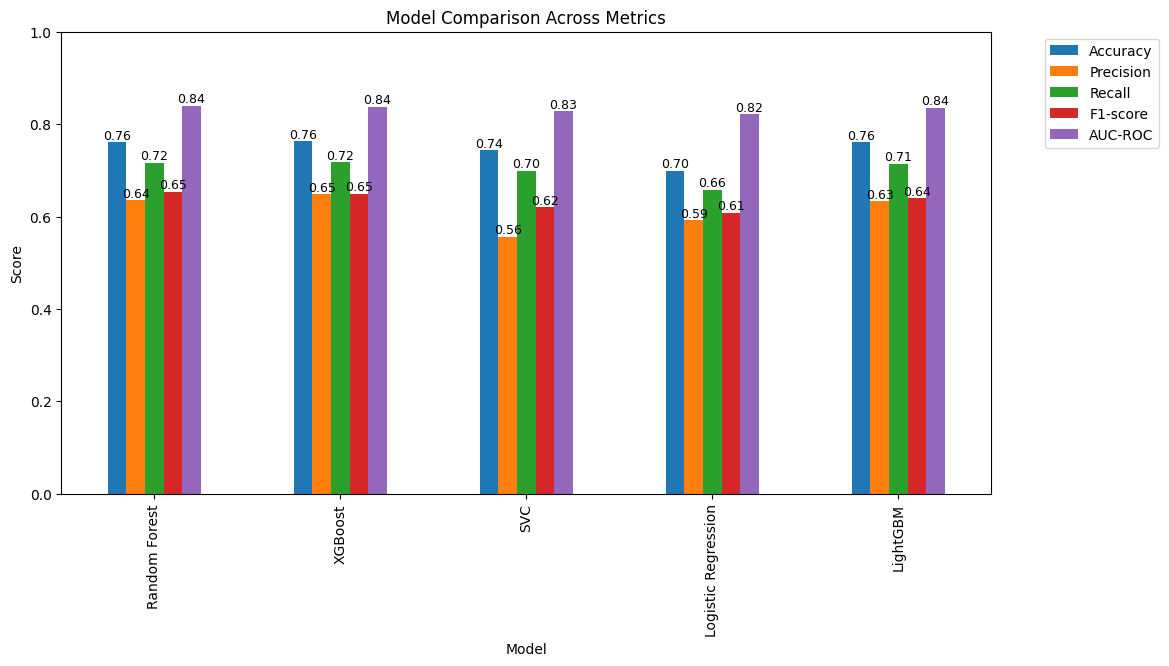

In [155]:
import matplotlib.pyplot as plt

metrics = ["Accuracy", "Precision", "Recall", "F1-score", "AUC-ROC"]

ax = results_df.set_index("Model")[metrics].plot(kind="bar", figsize=(12,6))

plt.title("Model Comparison Across Metrics")
plt.ylabel("Score")
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=9)

plt.show()

In [156]:
accuracy_scores = {
    "XGBoost": accuracy_score(y_test, y_preds_xgb),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "LightGBM": accuracy_score(y_test, y_preds_lgbm)
}

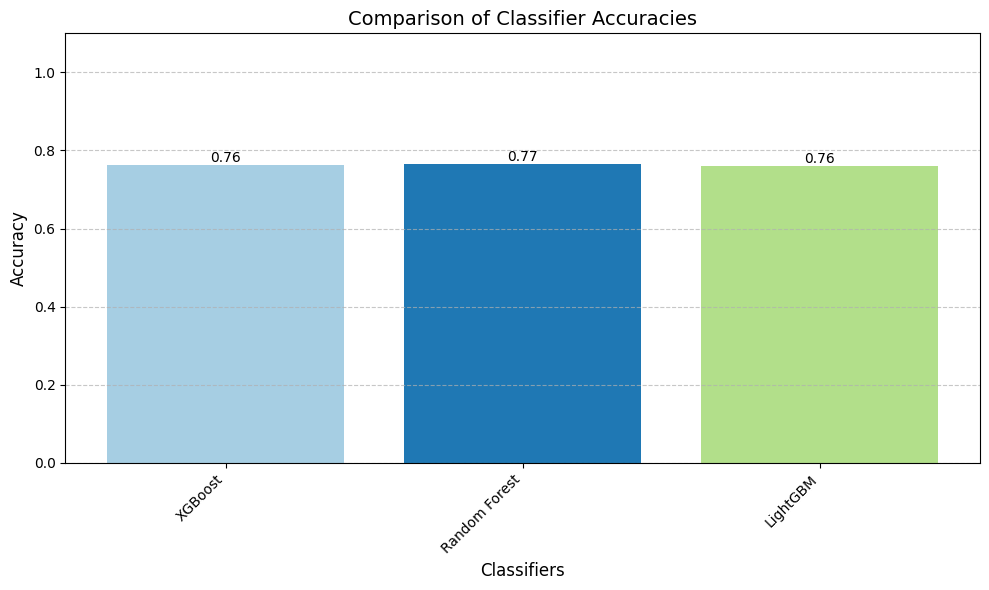

In [157]:
import numpy as np
plt.figure(figsize=(10, 6))
colors = plt.cm.Paired(np.arange(len(accuracy_scores)))  # Used a colormap for different bar colors
bars = plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=colors)

# Add accuracy values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Add labels, title, and formatting
plt.xlabel('Classifiers', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Comparison of Classifier Accuracies', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.1)  # Extend limit slightly above 1 for better visibility of text
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

## 5. Hyperparameter Tuning¶
Optimize hyperparameters for each model using systematic search methods.
Identify the best configuration for improved performance.

In [162]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [166]:
#Define hyperparameters for Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15],  
    'min_samples_split': [4, 6, 8, 10],
    'min_samples_leaf': [2, 4, 6], 
    'max_features': ['sqrt', 'log2']  # keep randomness
}

In [168]:
rf_random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                      param_distributions=rf_params, n_iter=60, cv=5, random_state=42)
rf_random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=60,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [2, 4, 6],
                                        'min_samples_split': [4, 6, 8, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42)

In [169]:
print("Best CV Score:", rf_random_search.best_score_)
print("Best Parameters:", rf_random_search.best_params_)

Best CV Score: 0.7631169565910824
Best Parameters: {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 15, 'criterion': 'entropy'}


In [172]:
rf_random_search.cv_results_
tuning_result_rf_rs = pd.DataFrame(rf_random_search.cv_results_)
tuning_result_rf_rs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.143890,0.078101,0.100225,0.008115,200,6,6,log2,15,entropy,"{'n_estimators': 200, 'min_samples_split': 6, ...",0.762199,0.761355,0.765139,0.756773,0.756375,0.760368,0.003346,17
1,2.556136,0.044105,0.043734,0.008214,100,6,2,sqrt,10,gini,"{'n_estimators': 100, 'min_samples_split': 6, ...",0.759211,0.755777,0.759960,0.747610,0.749602,0.754432,0.005002,25
2,2.860749,0.052483,0.050130,0.005821,100,4,2,log2,15,gini,"{'n_estimators': 100, 'min_samples_split': 4, ...",0.762796,0.763546,0.764343,0.755578,0.757171,0.760687,0.003590,14
3,1.487407,0.137771,0.025507,0.008127,100,8,6,sqrt,5,gini,"{'n_estimators': 100, 'min_samples_split': 8, ...",0.746067,0.738845,0.748207,0.737251,0.739243,0.741922,0.004362,45
4,13.021362,0.205772,0.149256,0.004999,300,8,6,sqrt,15,entropy,"{'n_estimators': 300, 'min_samples_split': 8, ...",0.765385,0.762151,0.764741,0.756972,0.756972,0.761244,0.003652,10
5,4.477077,0.025963,0.055619,0.004713,300,10,4,log2,5,entropy,"{'n_estimators': 300, 'min_samples_split': 10,...",0.743079,0.736454,0.748207,0.733267,0.734263,0.739054,0.005713,59
6,3.609205,0.056160,0.048141,0.003206,100,8,4,log2,15,entropy,"{'n_estimators': 100, 'min_samples_split': 8, ...",0.765186,0.762550,0.764940,0.757371,0.756972,0.761404,0.003579,9
7,6.912701,0.150883,0.098075,0.007595,200,10,2,sqrt,15,gini,"{'n_estimators': 200, 'min_samples_split': 10,...",0.765983,0.764143,0.762749,0.757769,0.758765,0.761882,0.003141,8
8,2.927392,0.054756,0.057765,0.008639,100,6,4,log2,15,gini,"{'n_estimators': 100, 'min_samples_split': 6, ...",0.764190,0.760359,0.764143,0.754382,0.756175,0.759850,0.004023,20
9,7.060071,0.133860,0.099486,0.009736,200,6,2,sqrt,15,gini,"{'n_estimators': 200, 'min_samples_split': 6, ...",0.766182,0.763546,0.765737,0.758765,0.759960,0.762838,0.002999,3


In [174]:
rf_random_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 15,
 'criterion': 'entropy'}

In [182]:
rf_model_rs = RandomForestClassifier(n_estimators=100,       #random forest model after parameter tuning
 min_samples_split= 6,
 min_samples_leaf= 2,
 max_features= 'log2',
 max_depth= 15,
 criterion= 'entropy')
rf_model_rs.fit(x_train, y_train)
y_pred_tune = rf_model_rs.predict(x_test)

In [184]:
rf_model_rs.score(x_train,y_train)

0.8144695430460938

In [186]:
print("\nAfter hyper parameter tuning Random Forest Model Performance:")     #After hyper parameter tuning random forest Model accuracy 
print("Accuracy:", accuracy_score(y_test, y_pred_tune), '\n') 
print("Classification Report:") 
print(classification_report(y_test, y_pred_tune))


After hyper parameter tuning Random Forest Model Performance:
Accuracy: 0.7651979921918572 

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.98      0.86      1103
           1       0.18      0.00      0.00      1075
           2       0.75      0.96      0.84      1099
           3       0.77      0.94      0.85      2102

    accuracy                           0.77      5379
   macro avg       0.62      0.72      0.64      5379
weighted avg       0.65      0.77      0.68      5379



#### Final performance of Random Forest with random search best parameters

In [188]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [199]:
strat_kfold_scores = cross_val_score(rf_model, x_train, y_train, cv=strat_kfold, scoring='accuracy')
strat_kfold_scores

array([0.75960964, 0.76195219, 0.76454183, 0.7689243 , 0.76414343])

In [200]:
strat_kfold_scores_rounded = [round(score, 2) for score in strat_kfold_scores]
strat_kfold_scores_rounded

[0.76, 0.76, 0.76, 0.77, 0.76]

In [201]:
print("Stratified K-Fold Cross Validation Scores (5 folds):", strat_kfold_scores_rounded)
print(f"Mean Stratified K-Fold Accuracy: {round(strat_kfold_scores.mean(), 2)}")

Stratified K-Fold Cross Validation Scores (5 folds): [0.76, 0.76, 0.76, 0.77, 0.76]
Mean Stratified K-Fold Accuracy: 0.76
